In [ ]:
# !pip install tensorflow
# !pip install matplotlib


In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


Say we have a function that we want to minimize

In [9]:
def test_function(x):
    return x**2 - 6 * x + 5

We'd like to be able to get quickly to the x=3

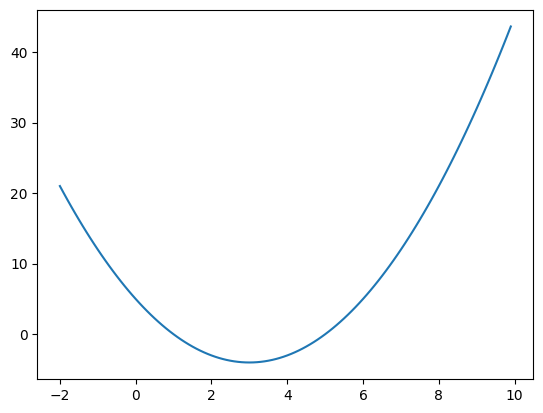

In [88]:
xs = [ x / 10.0 for x in range(-20, 100)]
ys = list(map(test_function, xs))

plt.plot(xs, ys)
plt.show()

So we can use TensorFlow's inbuilt gradient descent.

We'll start at x=0 and take small steps in the direction where the function decreases.

- This is obviously sensitive to how far we step, and we may step too far and never get closer.
 - We may also just find a local minimum as we aren't looking at the global view of the surface.

In [86]:
path = []
alpha = 0.1

x = tf.Variable(0.0)

for _ in range(10):
  
  with tf.GradientTape() as tape:
    y = test_function(x)

  dy_dx = tape.gradient(y, x)
  x.assign_sub(alpha * dy_dx)

  path.append(x.numpy())
  
print(x)
print(x.numpy())

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.6778774>
2.6778774


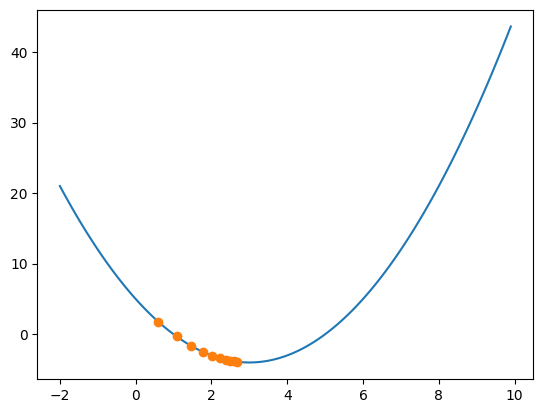

In [89]:
plt.plot(xs, ys)
plt.plot(path, list(map(test_function, path)), "o")
plt.show()

And we can use this technique in higher dimensions

In [90]:
def test_function2(x,y):
    return (x - 1) ** 2 + (y - 1) ** 2 

Which looks like

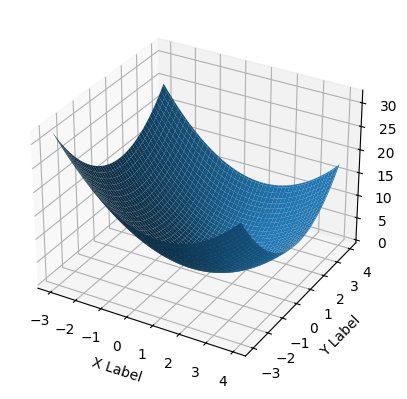

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 4.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(test_function2(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

And it's just the same old code

In [79]:

x = tf.Variable(-3.0)
y = tf.Variable(3.0)

for _ in range(100):
  
  with tf.GradientTape() as tape:
   
    z = test_function2(x,y)

  dz_dx, dz_dy = tape.gradient(z, [x,y])
  x.assign_sub(alpha * dz_dx)
  y.assign_sub(alpha * dz_dy)
  
print(x.numpy(),y.numpy())
  

0.9999999 1.0000002


We apply the same idea to train the neural network.

Use a [layer](https://keras.io/api/layers/)

In [82]:
layer = tf.keras.layers.Dense(1, activation='relu')
print(layer.trainable_variables)

x = tf.constant([[1., 1.]])

with tf.GradientTape() as tape:
  y = layer(x)
  loss = tf.reduce_mean(y**2)

grad = tape.gradient(loss, layer.trainable_variables)

for var in zip(layer.trainable_variables, grad):
  var[0].assign_sub(var[1] * 0.1)

[]


In [8]:
print(layer.trainable_variables)

[<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.06929496],
       [ 0.56801426]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-0.16623977], dtype=float32)>]
